In [1]:
%matplotlib inline
import warnings
from math import sqrt
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import itertools
from math import factorial

### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
a = input("Крутните рулетку, нажав Enter")
print("Выпало следующеее число: ", int(np.random.uniform(0, 36)))

Крутните рулетку, нажав Enter
Выпало следующеее число:  30


In [3]:
for i in range(0, 5):
    a = input("Крутните рулетку, нажав Enter")
    print("Выпало следующеее число: ", round(np.random.uniform(0, 36)))
    print()
print("Игра окончена!")

Крутните рулетку, нажав Enter
Выпало следующеее число:  16

Крутните рулетку, нажав Enter
Выпало следующеее число:  4

Крутните рулетку, нажав Enter
Выпало следующеее число:  6

Крутните рулетку, нажав Enter
Выпало следующеее число:  33

Крутните рулетку, нажав Enter
Выпало следующеее число:  18

Игра окончена!


### 2.1.	Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

Проверим следующую теорему: "Если А, В, … – полная группа несовместных событий, то  Р(А) + Р(В) +  …. = 1"  
Смоделируем в программе бросание монтки 100 раз

In [4]:
k,m = 0, 0
n = 100
for i in range(0, n):
    x = np.random.uniform(0, 10)
    if x<5:
        k = k + 1
    else:
        m = m + 1
print(f"Орел выпал {k} раз. Вероятность его выпадения, полученная эмпитическим путем составила {k/n}")
print(f"Решка выпала {m} раз. Вероятность ее выпадения, полученная эмпитическим путем составила {m/n}")
print (f"Сума вероятносте выпадения орла и решки: {k/n}+{m/n} = {k/n+m/n}")
if k/n+m/n == 1:
    print("Теорема подтверждена")
elif k/n+m/n != 1:
    print("Теорема не подтверждена")

Орел выпал 57 раз. Вероятность его выпадения, полученная эмпитическим путем составила 0.57
Решка выпала 43 раз. Вероятность ее выпадения, полученная эмпитическим путем составила 0.43
Сума вероятносте выпадения орла и решки: 0.57+0.43 = 1.0
Теорема подтверждена


### 2.2. Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.


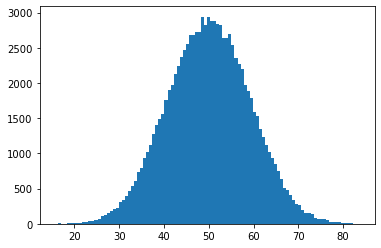

In [5]:
a = []
for i in range(10):
    a.append(np.random.uniform(0, 10, size=(100000)))
plt.hist(sum(a), 100)
plt.show()

Видим ,что распределение сумм носит нормальное распределение.

### 3.1.	Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

Рассчитаем вероятность с помощью метода Монте-Карло

In [6]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
# print(a, b, c, d)
# print(x)
print(k, n, k/n)

3806 10000 0.3806


Рассчитаем вероятность через формулы биномиального распределения и сравним результаты.

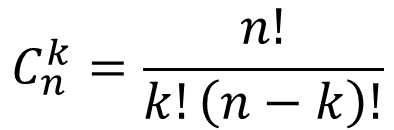

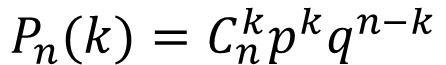

In [7]:
print("Вероятность выпадения 2 успехов на 4 испытаниях равна: ", factorial(4)/(factorial(2)*factorial(4-2))*(0.5**2)*0.5**(2))
print(f"Разница расчетов по формулам и методом Монте-Карло составила: {abs(factorial(4)/(factorial(2)*factorial(4-2))*(0.5**2)*0.5**(2) - k/n)*100:.2}%")

Вероятность выпадения 2 успехов на 4 испытаниях равна:  0.375
Разница расчетов по формулам и методом Монте-Карло составила: 0.56%


### 3.2.	Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

Возьмем k=3, n=100

In [8]:
k, n = 0, 100
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 3:
        k = k + 1
# print(a, b, c, d)
# print(x)
print(k, n, k/n)

23 100 0.23


Рассчитаем вероятность через формулы биномиального распределения и сравним результаты.

In [9]:
print("Вероятность выпадения 3 успехов на 4 испытаниях равна: ", factorial(4)/(factorial(3)*factorial(4-3))*(0.5**2)*0.5**(2))
print(f"Разница расчетов по формулам и методом Монте-Карло составила: {abs(factorial(4)/(factorial(3)*factorial(4-3))*(0.5**2)*0.5**(2) - k/n)*100:.2}%")

Вероятность выпадения 3 успехов на 4 испытаниях равна:  0.25
Разница расчетов по формулам и методом Монте-Карло составила: 2.0%


Видим большую разницу расчетов по формулам и методом Монте-Карло при маленьком n. Увеличим n в 1000 раз.

In [10]:
k, n = 0, 100000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 3:
        k = k + 1
# print(a, b, c, d)
# print(x)
print(k, n, k/n)

25089 100000 0.25089


In [11]:
print("Вероятность выпадения 3 успехов на 4 испытаниях равна: ", factorial(4)/(factorial(3)*factorial(4-3))*(0.5**2)*0.5**(2))
print(f"Разница расчетов по формулам и методом Монте-Карло составила: {abs(factorial(4)/(factorial(3)*factorial(4-3))*(0.5**2)*0.5**(2) - k/n)*100:.2}%")

Вероятность выпадения 3 успехов на 4 испытаниях равна:  0.25
Разница расчетов по формулам и методом Монте-Карло составила: 0.089%


Видим, что разницасуществено сократилась

### 4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [12]:
for p in itertools.permutations("01234", 3):
    print(''.join(str(x) for x in p))

012
013
014
021
023
024
031
032
034
041
042
043
102
103
104
120
123
124
130
132
134
140
142
143
201
203
204
210
213
214
230
231
234
240
241
243
301
302
304
310
312
314
320
321
324
340
341
342
401
402
403
410
412
413
420
421
423
430
431
432


In [13]:
for p in itertools.combinations("01234",3):
    print(''.join(p))

012
013
014
023
024
034
123
124
134
234


### 5. Дополните код расчетом коэффициента корреляции x и y по формуле
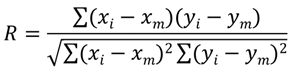

0.7071532354674468 0.15297926840805154
0.7071532354674487 0.15297926840805048


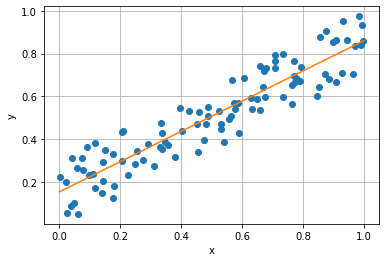

In [14]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

xm = np.sum(x)/n
ym = np.sum(y)/n
      
R = (np.sum((x-xm)*(y-ym))/sqrt(np.sum((x-xm)**2*np.sum((y-ym)**2))))

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)

plt.plot([0, 1], [b, a + b])
plt.show()

In [15]:
print("Коэффициент корреляции x и y равен ",R)

Коэффициент корреляции x и y равен  0.9270346299069699


Проверим правильность расчета коэффициента корреляции с помщью встроееной функции numpy. 

In [16]:
print(np.corrcoef(x, y))

[[1.         0.92703463]
 [0.92703463 1.        ]]


Видим, что коэффициенты корреляции совпали, значит я расчитал его правильно.